<a href="https://colab.research.google.com/github/abhishek-parashar/Reddit-flair-detection/blob/master/scripts/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the required libraries for analysis and visualisation 


In [0]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import datetime as dt
from sklearn.feature_extraction.text import TfidfVectorizer
from yellowbrick.text import TSNEVisualizer
from yellowbrick.datasets import load_hobbies
from yellowbrick.text import FreqDistVisualizer
from sklearn.feature_extraction.text import CountVectorizer

## loading the data

In [0]:
data=pd.read_csv('datafinal.csv')

looking for the data shape 

In [8]:
data.shape

(1218, 12)

names of columns

In [9]:
data.columns

Index(['Unnamed: 0', 'flair', 'title', 'score', 'id', 'url', 'comms_num',
       'body', 'author', 'comments', 'timestamp', 'combined_features'],
      dtype='object')

It's clearly obvious unnamed: 0 and id have no use in the data so dropping them 


In [0]:
data.drop('id',axis=1,inplace=True)

In [0]:
data.drop('Unnamed: 0', axis=1, inplace= True )

In [12]:
data.shape

(1218, 10)

obtaining the first 5 rows of data

In [13]:
data.head()

,flair,title,score,url,comms_num,body,author,comments,timestamp,combined_features
0,AskIndia,4 days ago pending orders 100 million hydroxyc...,93,https://www.reddit.com/r/india/comments/fwjdqr...,6,getting frantic calls pharma customers delayed...,india_ko_vanakkam,modi stockholm syndrome fair evidence chloroqu...,2020-04-07 20:07:04,4 days ago pending orders 100 million hydroxyc...
1,AskIndia,randians big time users dating apps like tinde...,18,https://www.reddit.com/r/india/comments/fizkkk...,19,id stint apps couple months one point didnt fe...,__knockknockturnal__,someone matched tell im fat cat 1 general foll...,2020-03-15 18:48:06,randians big time users dating apps like tinde...
2,AskIndia,r india thinks flat earthers,7,https://www.reddit.com/r/india/comments/f25vx0...,31,encountered foreigner ig says round earth hoax...,Dev1003,havent found indian yet believes earth flat de...,2020-02-11 17:10:55,r india thinks flat earthershavent found india...
3,AskIndia,people left 9 5 jobs pursue career music art f...,44,https://www.reddit.com/r/india/comments/dtvliq...,34,couldnt add askindia flair mobile browser,c0mrade34,engineer advertisement shoots since last 1year...,2019-11-09 20:57:35,people left 9 5 jobs pursue career music art f...
4,AskIndia,somebody want kill full family,97,https://www.reddit.com/r/india/comments/b7pvwt...,24,24hrs local police station register case dont ...,amitkumarthakur,calm downgo sp office town file grievance imme...,2019-04-01 01:00:35,somebody want kill full familycalm downgo sp o...


getting data inforation 

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   flair              1218 non-null   object
 1   title              1218 non-null   object
 2   score              1218 non-null   int64 
 3   url                1218 non-null   object
 4   comms_num          1218 non-null   int64 
 5   body               693 non-null    object
 6   author             1218 non-null   object
 7   comments           1096 non-null   object
 8   timestamp          1218 non-null   object
 9   combined_features  1218 non-null   object
dtypes: int64(2), object(8)
memory usage: 95.3+ KB


### by this we find that body has a lot of null values. This shows that for most of the posts only the title suffice, there is no need of body. 
### plots can be made for the posts having body and no of words in such posts this would give more insights to the data. 
### second in the list which has missing values is comments. This is quite resonable as not all the posts get comments, next thing which can be checked is what is the score of the post with comments and what flair are the posts which get maximum comments. 


#### graphs which we can plot to get more insights of the data 
#### 1. plots of different feature values and which feature value has missing values.
#### 2. NO of posts and the flair they belong that have body.
#### 3. No of words in the body corresponding to the flairs- this will help us determine is body a good parameter or not for model.
#### 4. score of the posts with comments
#### 5. flair which gets maximum comments - this will help us in model 
#### 6. what are thw words or persons mentioned maximum times in comments
#### 7, what is the frequency of posts and comments.
#### 8. what are the embeddings of different words in body, title, comments and combined features

one more insight which we can do is 

In [16]:
data['flair'].value_counts()

Food                  100
AskIndia              100
Science/Technology    100
Politics              100
AMA                   100
Non-Political         100
Coronavirus           100
Photography           100
Business/Finance      100
Scheduled             100
Policy/Economy        100
Sports                100
[R]eddiquette          18
Name: flair, dtype: int64

This tells us two thing:-
###### First the data is mostly balanced 
###### second [R]eddiquette has minimum no of posts this is may be because not most of the people post in ediquette section or things concerning this

In [0]:
# converting to data frame
df=pd.DataFrame(data)

In [0]:
y=data.columns

In [0]:
x=data.count()

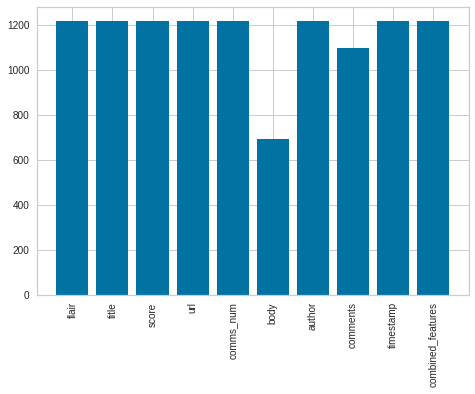

In [20]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
features = y 
values = x
ax.bar(y,x)
plt.xticks(rotation=90)
plt.savefig('value.png', dpi=300, bbox_inches='tight')
plt.show()

## getting no of words in title

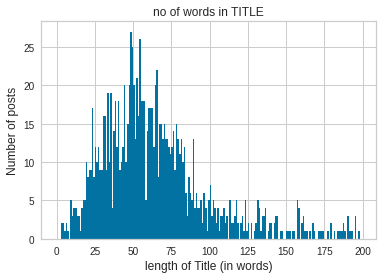

In [24]:
temp = df['title'].str.len()
temp.hist(bins = np.arange(0,200,1))
plt.title("no of words in TITLE")
plt.xlabel("length of Title (in words)", fontsize=12)
plt.ylabel("Number of posts", fontsize=12)
plt.savefig('title.png', dpi=300, bbox_inches='tight')
plt.show()

## getting no of words in body

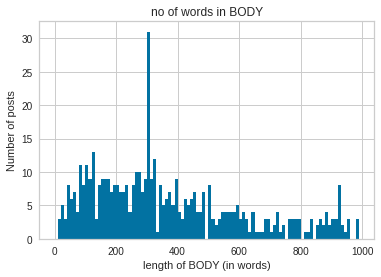

In [25]:

temp = df['body'].str.len()
temp.hist(bins = np.arange(0,1000,10))
plt.title("no of words in BODY")
plt.xlabel("length of BODY (in words)")
plt.ylabel("Number of posts")
plt.savefig('lenth of words in body.png', dpi=300, bbox_inches='tight')
plt.show()